#### Exercise 5: Variance reduction methods


1. Estimate the integral $\int_{0}^{1} e^x dx $ by simulation (the _crude_ Monte Carlo estimator). Use, for example, an estimator based on 100 samples and present your result as the point estimator and confidence interval  


In [92]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
from scipy.stats import t
np.random.seed(42)

#### Crude Monte Carlo estimator

We can interpret this interval as

$$
\theta = \int_{0}^{1} e^{x} \: dx = \mathrm{E}(e^{u}) \hspace{0.3cm} , \hspace{0.3cm} U \in \mathrm{U}(0,1)
$$

To estimate the integral obtain the sample of the random variable $e^{U}$ and take the average.

$$
X_{i} = e^{U_{i}} \hspace{0.3cm} , \hspace{0.3cm} \bar{X} = \frac{\sum_{i=1}^{n} X_{i}}{n}
$$

In [45]:
# the integral

# no. of samples
n = 100

# no. of samples obtained from uniform distribution
U = np.random.uniform(0, 1, n)

#  sample of the random variable e^U
eU = np.exp(U)

# Crude method
X_bar = sum(eU) / n

# analytic solution
analytic_sol = np.exp(1) - 1


In [46]:
# CI for 95%
def CI(data, alpha = 0.05):
    mean = np.mean(data)                                          # mean
    std = np.std(data)                                            # standard deviation
    variance = np.var(data)                                       # variance
    chi_squared = stats.t.ppf(1 - alpha/2, n -1)                  # variance
    lower = mean - chi_squared * (std / np.sqrt(len(data)))       # lower
    upper = mean + chi_squared * (std / np.sqrt(len(data)))       # upper    
    return mean, lower, upper, variance

# Obtain the CI and variance from crude method
mean, lower, upper, variance = CI(eU)

In [47]:
print(f"The estimate for the integral of exp(x) from 0 -> 1 is: {X_bar:.4f}")
print(f"The variance of the estimate is: {variance:.4f}")
print(f"The 95% CI for the crude Monte Carlo method is: [{lower:.4f}, {upper:.4f}]")
print(f"The analytical solution for the integral: {analytic_sol:.4f}")

The estimate for the integral of exp(x) from 0 -> 1 is: 1.6721
The variance of the estimate is: 0.2476
The 95% CI for the crude Monte Carlo method is: [1.5733, 1.7708]
The analytical solution for the integral: 1.7183


Confident Interval

2. Estimate the integral $\int_{0}^{1} e^x dx $  using antithetic variables, with comparable computer ressources.

We now estimate

$$
\theta = \mathrm{E}(Y)
$$

where we have two generated samples $Y_{1}$ and $Y_{2}$. An unbiased estimate of $\theta$ is then

$$
\hat{\theta} = \frac{ Y_{1} + Y_{2} }{ 2 }
$$

Moreover, since the estimator is positively correlated with $U_{i}$ (monotone function), we can use $1-U$ thus

$$
Y_{i} = \frac{e^{U_{i}} + e^{1 - U_{i}}}{2} =  \frac{ e^{U_{i}} + \frac{e}{e^{U_{i}}}}{2} \hspace{0.3cm} , \hspace{0.3cm} \bar{Y} = \frac{\sum_{i=1}^{n} Y_{i}}{n}
$$


In [ ]:
# no. of samples
n = 100

# no. of samples obtained from uniform distribution
U = np.random.uniform(0, 1, n)

# Obtain Y
Y = ( np.exp(U) + np.exp(1-U) )/ 2

# the mean
Y_bar = np.mean(Y)

In [51]:
# CI for 95%
def CI(data, alpha = 0.05):
    mean = np.mean(data)                                          # mean
    std = np.std(data)                                            # standard deviation
    variance = np.var(data)                                       # variance
    chi_squared = stats.t.ppf(1 - alpha/2, n -1)                  # variance
    lower = mean - chi_squared * (std / np.sqrt(len(data)))       # lower
    upper = mean + chi_squared * (std / np.sqrt(len(data)))       # upper    
    return mean, lower, upper, variance

# Obtain the CI and variance from crude method
mean, lower, upper, variance = CI(Y)

In [52]:
print(f"The estimate for the integral of exp(x) from 0 -> 1 is: {Y_bar:.4f}")
print(f"The variance of the estimate is: {variance:.4f}")
print(f"The 95% CI for the crude Monte Carlo method is: [{lower:.4f}, {upper:.4f}]")


The estimate for the integral of exp(x) from 0 -> 1 is: 1.7197
The variance of the estimate is: 0.0036
The 95% CI for the crude Monte Carlo method is: [1.7079, 1.7315]


3. Estimate the integral $\int_{0}^{1} e^x dx $ using a control variable, with comparable computer ressources.

Use $U$ as the control variable. Here $Y_{i} = U_{i}$ thus $\mu_{y} = \frac{1}{2}$.

$$
Z_{i} = X_{i} + c \left( U_{i} - \frac{1}{2} \right) \hspace{0.3cm} , \hspace{0.3cm} X_{i} = e^{U_{i}}
$$

We choose $c$ by

$$
c = -\frac{ \mathrm{Cov}(X,Y) }{ \mathrm{Var}(Y) }
$$


In [53]:
n = 1000
U = np.random.uniform(0,1,n)
X = np.exp(U)
Y = X
c = -np.cov(X,Y)[0,1] / np.var(Y)
Z = X + c * ( U - 0.5 )
Z_bar = np.mean(Z)


In [54]:
# Obtain the CI and variance from control variates
mean, lower, upper, variance = CI(Z)

print(f"The estimate for the integral of exp(x) from 0 -> 1 is: {Z_bar:.4f}")
print(f"The variance of the estimate is: {variance:.4f}")
print(f"The 95% CI for the crude Monte Carlo method is: [{lower:.4f}, {upper:.4f}]")

The estimate for the integral of exp(x) from 0 -> 1 is: 1.7225
The variance of the estimate is: 0.0452
The 95% CI for the crude Monte Carlo method is: [1.7093, 1.7357]


4. Estimate the integral $\int_{0}^{1} e^x dx $ using stratified sampling, with
comparable computer ressources.

In stratified sampling we sample in predetermined areas.

$$
W_{i} = \frac{\sum_{j=1}^{R} X_{i,j}}{k} = \frac{X_{i,0} + X_{i,1} + \ldots + X_{i,R}}{k}
$$

where $X_{i} = e^{U_{i}}$. So if $k=10$ we have

$$
W_{i} = \frac{e^{\frac{U_{i,1}}{10}} + e^{\frac{1}{10} + \frac{U_{i,2}}{10}} + \ldots + e^{\frac{9}{10} + \frac{U_{i,10}}{10}} }{10}
$$



In [61]:
# Define no. of samples
n = 1000

# Define no. of strata
k = 10

W = []
U = np.random.sample(100)
for i in range(k):
    x_min = i/k
    x_max = x_min + 1/k
    U = np.random.uniform(x_min, x_max, 10)
    e_U = np.exp(U)
    W = np.hstack([W, e_U])

# Take the mean
W_bar = np.mean(W)


In [62]:
# Obtain the CI and variance from stratified sampling
mean, lower, upper, variance = CI(W)

print(f"The estimate for the integral of exp(x) from 0 -> 1 is: {W_bar:.4f}") 
print(f"The variance of the estimate is: {variance:.4f}")
print(f"The 95% CI for the Monte Carlo method using stratified sampling is: \n [{lower:.4f}, {upper:.4f}]")

The estimate for the integral of exp(x) from 0 -> 1 is: 1.7206
The variance of the estimate is: 0.2457
The 95% CI for the Monte Carlo method using stratified sampling is: 
 [1.6233, 1.8178]


5. Use control variates to reduce the variance of the estimator in
exercise 4 (Poisson arrivals).

We now use control variates. We let $Y$ be the mean of the arrival rates thus $\mu_{Y}$ is the mean of the mean arrival rates.

$$
Z_{i} = X_{i} + c ( Y_{i} - \mu_{Y} )
$$

And choose $c$ by

$$
c = -\frac{ \mathrm{Cov}(X,Y) }{ \mathrm{Var}(Y) }
$$


In [118]:
# No. of customers
n = 10000

# Mean service time
s = 8

# Mean arrival rate
l = 1

# No. of service units
m = 10

# No. of runs
r = 10


In [119]:
# Generate X arrival times from poisson distribution
X = np.random.poisson(1/l, (n, r))
# X = np.random.exponential(1/l, n)

# Y is the mean of the arrival rates
Y = np.mean(X, axis=1)
mu_Y = np.mean(Y)

# Obtain c
c = np.zeros(r)
for i in range(r):
    c_i = -np.cov(X[:,i], Y)[0,1] / np.var(Y)
    c[i] = c_i
    
# Generate Z arrival times from control variates
Z = np.zeros(np.shape(X))
for i in range(r):
    Z_i = X[:,i] + c[i] * ( Y - np.mean(Y) )
    Z[:,i] = Z_i

In [120]:
def simulate_blocking_system_cv(m, s, arrival_time, n, r, inter_arrival_times):
    blocked_customers = []

    for k in range(r): 
        num_blocked = 0
        busy_servers = 0
        current_time = 0
        
        # Take cumsum of inter arrival times
        arrival_times = np.cumsum(inter_arrival_times[:,k])
        
        # General service times from exponential distribution
        service_times = np.random.exponential(s, n)
        departure_times = np.zeros(n)
    
        # Event queue
        events = []
        
        for i in range(n):
            events.append((arrival_times[i], 'arriving', i))
        
        # Sort events per time
        events.sort() 

        for e in events:
            event_time, event_type, customer_index = e
            current_time = event_time

            if event_type == 'arriving':
                if busy_servers < m:
                    
                    busy_servers += 1
                    departure_time = current_time + service_times[customer_index]
                    departure_times[customer_index] = departure_time
                    events.append((departure_time, 'departing', customer_index))
                    
                    # Re-sort events after adding a departure
                    events.sort()
                else:
                    num_blocked += 1
            elif event_type == 'departing':
                busy_servers -= 1

        blocked_customers.append(num_blocked)

    return blocked_customers

# Simulate to obtain no. of blocked customers
blocked_customers_cv = simulate_blocking_system_cv(m, s, 1/l, n, r, Z)
blocked_customers_cv = np.array(blocked_customers_cv)

In [122]:
# Compute the fraction of blocked customers
mean_blocking_percentage_cv = np.mean(blocked_customers_cv) / n
print(f"Fraction of blocked customers (simulation method with constant service times and poisson distributed arrival times): \n {mean_blocking_percentage:.4f}")

 
# number of runs
r = len(blocked_customers_cv)

# convert counts to probabilities per run
theta_hat_cv = blocked_customers_cv / n   # if 'n' is the total offered customers
#print(f"Theta hat     : {theta_hat}")

# sample mean
theta_bar_cv = np.sum(theta_hat_cv) / r
#theta_bar  = np.mean(theta_hat)

# sample variance via the formula you gave
S2_cv = (np.sum(theta_hat_cv**2) - r * theta_bar_cv**2) / (r - 1)
#S2         = np.var(theta_hat, ddof=1)
S_cv = np.sqrt(S2_cv)

# Obtain alpha/2 and 1-alpha/2 quantile from t-distribution '

# Obtain t
alpha = 0.05 #significance level 5% , so we're constructing a 95% confidence interval (CI)
df = r - 1 #degrees of freedom
t_lower = t.ppf(alpha / 2, df) #  critical t-value = -2.26
t_upper = t.ppf(1 - alpha / 2, df) #  critical t-value = 2.26

lower = theta_bar_cv + ( S_cv / np.sqrt(r) ) * t_lower
upper = theta_bar_cv + ( S_cv / np.sqrt(r) ) * t_upper

print(f"The 95% CI for the fraction of blocked customers using control variates is: \n [{lower:.4f}, {upper:.4f}]")

# Compute variance of blocked customers using control variates
variance_blocked_cv = np.var(blocked_customers_cv) / n
print(f"The variance of the fraction of block customers is (control variates): {variance_blocked_cv:.4f}")

Fraction of blocked customers (simulation method with constant service times and poisson distributed arrival times): 
 0.1176
The 95% CI for the fraction of blocked customers using control variates is: 
 [0.1133, 0.1222]
The variance of the fraction of block customers is (control variates): 0.3442


Compare the variance and CI with the standard case (without using control variates) in the previous exercise.

In [123]:
def simulate_blocking_system(m, s, arrival_time, n, r):
    blocked_customers = []

    for _ in range(r):
        
        num_blocked = 0
        busy_servers = 0
        current_time = 0

        # Generate arrival from poisson distribution
        inter_arrival_times = np.random.exponential(arrival_time, n)
        arrival_times = np.cumsum(inter_arrival_times)
        
        # General service times from exponential distribution
        service_times = np.random.exponential(s, n)
        departure_times = np.zeros(n)
        
        # Event queue
        events = []
        
        for i in range(n):
            events.append((arrival_times[i], 'arriving', i))
        
        # Sort events per time
        events.sort() 

        for e in events:
            event_time, event_type, customer_index = e
            current_time = event_time

            if event_type == 'arriving':
                if busy_servers < m:
                    
                    busy_servers += 1
                    departure_time = current_time + service_times[customer_index]
                    departure_times[customer_index] = departure_time
                    events.append((departure_time, 'departing', customer_index))
                    
                    # Re-sort events after adding a departure
                    events.sort()
                else:
                    num_blocked += 1
            elif event_type == 'departing':
                busy_servers -= 1

        blocked_customers.append(num_blocked)

    return blocked_customers

# No. of runs
r = 10

# Simulate to obtain no. of blocked customers
blocked_customers = simulate_blocking_system(m, s, 1/l, n, r)

In [124]:
blocked_customers = np.array(blocked_customers)

# Compute the fraction of blocked customers
mean_blocking_percentage = np.mean(blocked_customers) / n
print(f"Fraction of blocked customers (simulation method): \n {mean_blocking_percentage:.4f}")

 
# number of runs
r = len(blocked_customers)

# convert counts to probabilities per run
theta_hat = blocked_customers / n   # if 'n' is the total offered customers
#print(f"Theta hat     : {theta_hat}")

# sample mean
theta_bar = np.sum(theta_hat) / r
#theta_bar  = np.mean(theta_hat)

# sample variance via the formula you gave
S2 = (np.sum(theta_hat**2) - r * theta_bar**2) / (r - 1)
#S2         = np.var(theta_hat, ddof=1)
S = np.sqrt(S2)

# Obtain alpha/2 and 1-alpha/2 quantile from t-distribution '

# Obtain t
alpha = 0.05 #significance level 5% , so we're constructing a 95% confidence interval (CI)
df = r - 1 #degrees of freedom
t_lower = t.ppf(alpha / 2, df) #  critical t-value = -2.26
t_upper = t.ppf(1 - alpha / 2, df) #  critical t-value = 2.26

lower = theta_bar + ( S / np.sqrt(r) ) * t_lower
upper = theta_bar + ( S / np.sqrt(r) ) * t_upper

print(f"The 95% CI for the fraction of blocked customers is: \n [{lower:.4f}, {upper:.4f}]")

# Compute variance of blocked customers using control variates
variance_blocked_cv = np.var(blocked_customers_cv) / n
print(f"The variance of the fraction of block customers is: {variance_blocked_cv:.4f}")

Fraction of blocked customers (simulation method): 
 0.1182
The 95% CI for the fraction of blocked customers is: 
 [0.1136, 0.1227]
The variance of the fraction of block customers is: 0.3442


So without using control variates the variance of the fraction of blocked customers is $\sim 0.47$ but when we use control variates we reduce the variance of this fraction to $\sim 0.34$.

6. Demonstrate the effect of using common random numbers in
exercise 4 for the difference between Poisson arrivals (Part 1) and a
renewal process with hyperexponential interarrival times. Remark:
You might need to do some thinking and some re-programmin

In [ ]:
def sample_poisson(U, lam):
    n = len(U)
    samples = np.zeros(n, dtype=int)
    
    for i in range(n):
        k = 0
        cum_prob = np.exp(-lam)  # Initialize with P(X=0) = exp(-lam)
        F_k = cum_prob
        
        while U[i] > cum_prob:
            k += 1
            F_k *= lam / k  # Update F(k)
            cum_prob += F_k
        
        samples[i] = k
    
    return samples

In [ ]:
# Define no. of samples
n = 1000

# Arrival time
a = 1

# No. of runs
r = 10

# Generate uniform random numbers
U = np.random.uniform(0, 1, (n,r))

# Obtain samples for arrival time as Poisson process
poisson_samples = np.zeros((n,r))
for i in range(r):
    poisson_samples_i = sample_poisson(U[:,i], 1/a)
    poisson_samples[:,i] = poisson_samples_i
    

#### 6. Demonstrate the effect of using common random numbers in exercise 4 for the difference between Poisson arrivals (Part 1) and a renewal process with hyperexponential interarrival times. Remark: You might need to do some thinking and some re-programming.


 Use $U$ to generate the Poisson and hyperexponential arrivals. Used these arrivals to run the "blocked customers" simulation and computed the difference in the mean fraction of blocked customers.We first get the arrivals using the Poisson distribution.

In [128]:
def sample_poisson(U, lam):
    n = len(U)
    samples = np.zeros(n, dtype=int)
    
    for i in range(n):
        k = 0
        cum_prob = np.exp(-lam)  # Initialize with P(X=0) = exp(-lam)
        F_k = cum_prob
        
        while U[i] > cum_prob:
            k += 1
            F_k *= lam / k  # Update F(k)
            cum_prob += F_k
        
        samples[i] = k
    
    return samples

In [129]:
# Define no. of samples
n = 1000

# Arrival time
a = 1

# No. of runs
r = 10

# Generate uniform random numbers
U = np.random.uniform(0, 1, (n,r))

# Obtain samples for arrival time as Poisson process
poisson_samples = np.zeros((n,r))
for i in range(r):
    poisson_samples_i = sample_poisson(U[:,i], 1/a)
    poisson_samples[:,i] = poisson_samples_i
    

The hyperexponential distribution has the probability density function given by

$$
f_{X}(x) = \sum_{i=1}^{n} f_{Y_{i}}(x) p_{i}
$$

where $f_{Y_{i}}(x)$ is an exponential distributed random variable with the rate parameters as given. The parameters for the hyperexponential distribution are

$$
p_{1} = 0.8, \lambda_{1} = 0.8333, p_{2} = 0.2, \lambda_{2} = 5.0
$$


In [130]:
def sample_exponential(U, lam):
    return -np.log(1 - U) / lam

In [131]:
# Define lambda_i's and p_i's
l1 = 0.8333
l2 = 5
p1 = 0.8
p2 = 0.2

# Obtain samples from exponential distribution
f_Y1 = np.zeros((n,r))
f_Y2 = np.zeros((n,r))
for i in range(r):
    f_Y1_i = sample_exponential(U[:,i], l1)
    f_Y2_i = sample_exponential(U[:,i], l2)
    f_Y1[:,i] = f_Y1_i
    f_Y2[:,i] = f_Y2_i

# Obtain f_X
f_X = p1 * f_Y1 + p2 * f_Y2
hyperexp_samples = f_X

With the arrival times from both distributions found using the same random numbers $U$ we can run the simulation and see the difference in the mean fraction of blocked customers.

$$
\theta_{Z} = \theta_{1} - \theta_{2}
$$

Where $\theta_{1}$ is the mean blocking fraction from the Poisson arrivals and $\theta_{2}$ is the mean blocking fraction from the hyperexponential arrivals.


In [132]:
# Simulate to obtain no. of blocked customers (Poisson)
blocked_customers_poisson = simulate_blocking_system_cv(m, s, 1/l, n, r, poisson_samples)

# Simulate to obtain no. of blocked customers (hyperexponential)
blocked_customers_hyperexp = simulate_blocking_system_cv(m, s, 1/l, n, r, hyperexp_samples)

In [133]:
# Compute the fraction of blocked customers (Poisson)
mean_blocking_percentage_poisson = np.mean(blocked_customers_poisson) / n

# Compute the fraction of blocked customers (hyperexponential)
mean_blocking_percentage_hyperexp = np.mean(blocked_customers_hyperexp) / n

# Compute variance of blocked customers (Poisson)
variance_blocked_poisson = np.var(blocked_customers_poisson) / n

# Compute variance of blocked customers (hyperexponential)
variance_blocked_hyperexp = np.var(blocked_customers_hyperexp) / n

print("System 1: Poisson arrivals and exponential services:")
print(f"Fraction of blocked customers: {mean_blocking_percentage_poisson:.4f}")
print(f"The variance of the fraction of block customers is: {variance_blocked_poisson:.4f}")
print("----------------------------------------------------------")

print("System 2: Hyperexponential arrivals and exponential services:")
print(f"Fraction of blocked customers: {mean_blocking_percentage_hyperexp:.4f}")
print(f"The variance of the fraction of block customers is: {variance_blocked_hyperexp:.4f}")
print("----------------------------------------------------------")


System 1: Poisson arrivals and exponential services:
Fraction of blocked customers: 0.1343
The variance of the fraction of block customers is: 0.4066
----------------------------------------------------------
System 2: Hyperexponential arrivals and exponential services:
Fraction of blocked customers: 0.1201
The variance of the fraction of block customers is: 0.2517
----------------------------------------------------------


In [134]:
# Compute delta
delta = np.mean(mean_blocking_percentage_poisson - mean_blocking_percentage_hyperexp)

#delta = np.mean(blocked_customers_poisson - blocked_customers_hyperexp)
print(f"On average, the difference between the two systems is: {delta:.4f}")

On average, the difference between the two systems is: 0.0142


Since $\theta_{Z}$ is positive, this means that $\theta_{1}$ (Poisson arrivals) is greater than $\theta_{2}$ (hyperexponential arrivals) thus we see that the mean blocking fraction for hyperexponential arrivals is smaller.

7. For a standard normal random variable Z ∼ N(0, 1) using the crude
Monte Carlo estimator estimate the probability Z > a. Then try
importance sampling with a normal density with mean a and
variance $σ^2$. For the expirements start using $σ^2$ = 1, use different
values of a (e.g. 2 and 4), and different sample sizes. If time
permits experiment with other values for $σ^2$. Finally discuss the
efficiency of the methods.

In [135]:
# Define no. of samples 
n = 10000

# Obtain Z samples
mu = 0
sigma = 1
Z = np.random.normal(mu, sigma, n)

# Compute frequency where Z>a
a = 2
p_crude = np.sum(Z > a) / len(Z)

print(f"The probability that Z>{a} is: {p_crude:.4f}")
print("The true probability that Z>2 is 0.0227501325.")


The probability that Z>2 is: 0.0239
The true probability that Z>2 is 0.0227501325.


We now estimate the probability that $Z>a$ using importance sampling method where we define the target distribution as $f(x)$. In importance sampling we choose the proposal distribution $g(x)$ which has mean $a$ and $\sigma^2=1$ which has a significant overlap with $f(x)$ where $f(x)$ is small.

We obtain weights by computing

$$
w_{i} = \frac{f(z_{i})}{g(z_{i})}
$$

where $f(z_{i})$ and $g(z_{i})$ are the PDF values from the target and proposal distributions at $z_{i}$. To get $P(Z>a)$ we compute

$$
P(Z>a) = \sum_{i=1}^{n} \frac{ h(z_{i}>2) w_{i} }{ w_{i} }
$$

where $h(z_{i}>2)$ is simply an indicator function that is 1 when $z_{i}>2$ and 0 otherwise where $z_{i} \sim g(z_{i})$ ($z_{i}$ is sampled from our proposal distribution).


In [136]:
import scipy.stats as stats

In [ ]:
# Generate samples from proposal distribution
n = 1000
mu = 0
a = 2
sigma = 1
Z = np.random.normal(a, sigma, n)

# Obtain pdf-values from target and proposed distribution
target_pdf = stats.norm.pdf(Z, mu, sigma)
proposal_pdf = stats.norm.pdf(Z, a, sigma)
weights = target_pdf / proposal_pdf

# Estimate probability from importance sampling
indicator = np.where(Z < a, 0, 1)
p_IS = np.sum( indicator * weights ) / np.sum( weights )

# OR Importance sampling estimator of P(Z > 2)
# p_IS = np.sum((Z > 2) * weights) / np.sum(weights)

print(f"The probability that Z>{a} using crude method is:", p_crude)
print(f"The probability that Z>{a} using importance sampling is:", p_IS)
print("The true probability that Z>2 is 0.0227501325.")


The probability that Z>2 using crude method is: 0.0239
The probability that Z>2 using importance sampling is: 0.018628435751814956
The true probability that Z>2 is 0.0227501325.


8. Use importance sampling with g(x) = λ exp (−λ ∗ x) to calculate
the integral $\int_{0}^{1} e^x dx $ of Question 1. Try to find the optimal value of
λ by calculating the variance of $ h(X)f(X)/g(X) $ and verify by
simulation. Note that importance sampling with the exponential
distribution will not reduce the variance.

We run a new simulation for the optimal $\lambda$-value using Importance Sampling.

We have that the analytic formula for the variance is

$$
\frac{e^{2+\lambda} - 1}{\lambda ( 2 + \lambda )} - (e - 1)^2
$$


In [138]:
# Define analytic variance function
def analytic(l):
    f = ( np.exp( 2 + l ) - 1 ) / ( l * ( 2 + l ) ) - ( np.exp(1) - 1 )**2
    return f


In [140]:
n = 10000

def IS(n, l):
    def g(x, l):
        return l * np.exp(-l * x)
    Z = np.random.exponential(1/l, n)
    
    # Indicator function
    Z = Z[(Z>=0) & (Z<=1)]
    
    W = np.exp(Z) / g(Z, l)
    return np.mean(W), np.var(W)

# Initialize optimal values
mean_opt = None
var_opt = None
l_opt = None

# lambda values
var_list = []
l_list = np.linspace(0.5, 3, 100)

for l in l_list:
    mean, variance = IS(n, l)
    var_list.append(variance)
    if var_opt is None or variance < var_opt:
        mean_opt = mean
        var_opt = variance
        l_opt = l
    
print(f'Optimal lambda from simulation = {l_opt:.4f}, result = {mean_opt:.4f}, variance = {var_opt:.4f}')


Optimal lambda from simulation = 0.9798, result = 2.7368, variance = 2.5656


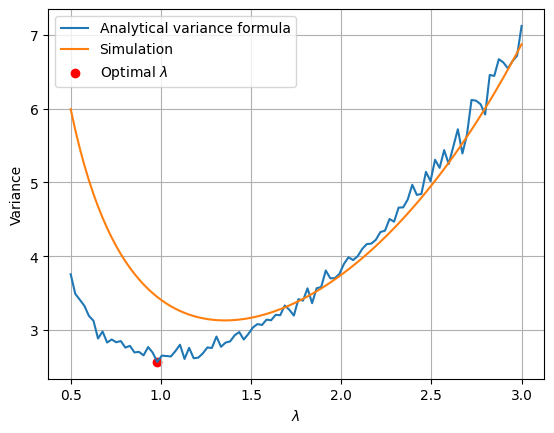

In [142]:
# Plotting
plt.plot(l_list, var_list)
plt.plot(l_list, analytic(l_list))
plt.scatter(l_opt, var_opt, color='red')
plt.legend(['Analytical variance formula','Simulation',r'Optimal $\lambda$'])
plt.xlabel(r'$\lambda$')
plt.ylabel('Variance')
plt.grid()
plt.show()


9. For the Pareto case derive the IS estimator for the mean using the
first moment distribution as sampling distribution. Is the approach
meaningful? and could this be done in general? With this insight
could you change the choice of $ g(x) $ in the previous question
(Question 8) such that importance sampling would reduce the
variance? You do not need to implement this, as long as you can
argue, what should happen

We have that the Pareto distribution is given by

$$
f(x) = \frac{\alpha x_{\alpha}^{m}}{x^{\alpha + 1}} \hspace{0.3cm} , \hspace{0.3cm} x \geq x_{m}
$$

Using the first moment distribution as our sampling distribution we have that the IS estimator for the mean is

$$
\mathrm{E}(X) = \frac{\alpha  x_{m}}{\alpha - 1}  \hspace{0.3cm} , \hspace{0.3cm} \alpha > 1
$$

Thus the first moment distribution for sampling may not be meaningful to implement as this function does not correspond to a known distribution. Given the shape of the Pareto distribution perhaps the Beta distribution would be more suitable and can better shape to fit the integration region.
